# Exploratory Data Analysis of Iris Dataset

We are going to do the following operations:
1. Read the dataset to python environment.
2. Display the columns in the dataset.
3. Calculate the mean of each column of the dataset.
4. Check for the null values present in the dataset.
5. Perform meaningful visualizations using the dataset.

## Reading the dataset
We read the xls file into the python environment using pandas library

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the xls data into a pandas dataframe
data = pd.read_excel("/content/iris.xls")
#Examining the head and tail of data
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Finding the columns in the data
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
data.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We found that the data have the following columns
* Sepal Length(SL)
* Sepal Width(SW)
* Petal Length(PL)
* Petal Width(PW)
* Classification: Classifies the data into 3 categories `Iris-Setosa`, `Iris-virginica`, `Iris-versicolor`.

In [5]:
#Determining the mean of each numeical column
data.mean(numeric_only= True)

SL    5.843333
SW    3.054000
PL    3.758667
PW    1.198667
dtype: float64

## Checking for Null Values
Using the `isna()` function of pandas library we can determine the number of NA values in the dataset

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

There are no NA values in the data

In [10]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

There are no null values in the data

## Visualisations of the data

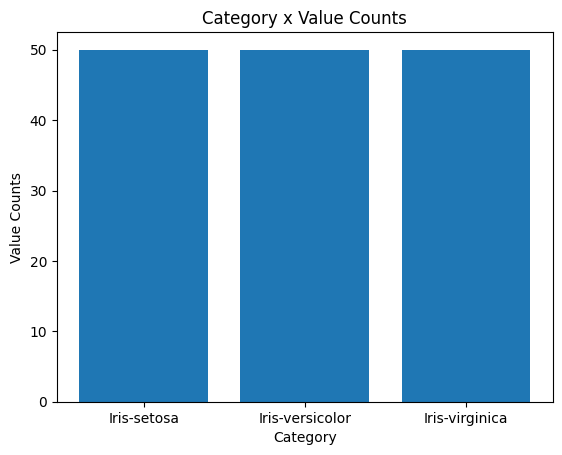

In [17]:
# Plotting the valuecounts of each type of classification
plt.bar(data.Classification.unique(),data.Classification.value_counts())
plt.xlabel("Category")
plt.ylabel("Value Counts")
plt.title("Category x Value Counts")
plt.show()

In [22]:
copy_of_data = data.copy()
copy_of_data.set_index('Classification', inplace=True)
copy_of_data

,SL,SW,PL,PW
Classification,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
Iris-virginica,6.7,3.0,5.2,2.3
Iris-virginica,6.3,2.5,5.0,1.9
Iris-virginica,6.5,3.0,5.2,2.0


In [64]:
# Creating a function to show how the Petal Length and petal width varies for each type of flower
def plot_pl_and_pw(flower):
  '''
  Plots the petal length and petal width of the given category of flower
  '''
  for i in flower:
    plt.figure(figsize=(10,7))
    print(i)
    plt.xlabel("Count")
    plt.ylabel("Length in cm")
    plt.yticks(np.arange(0,7,0.5))
    plt.plot(data[(data.Classification == i)].PL, color='green')
    plt.plot(data[(data.Classification == i)].PW, color='blue')
    plt.title(f"Petal Length and Petal Width of {i}")
    plt.legend(['PL','PW'])
    plt.show()


Iris-setosa


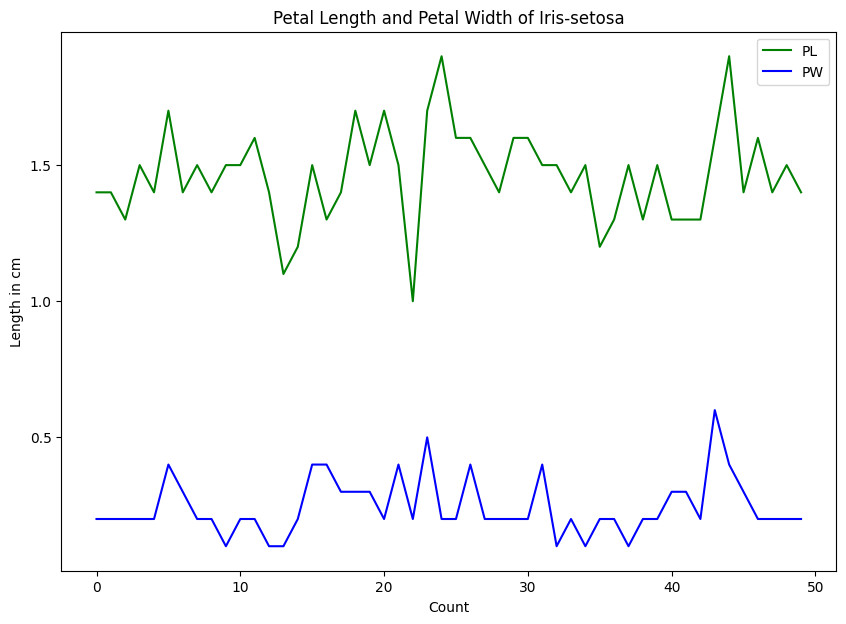

Iris-versicolor


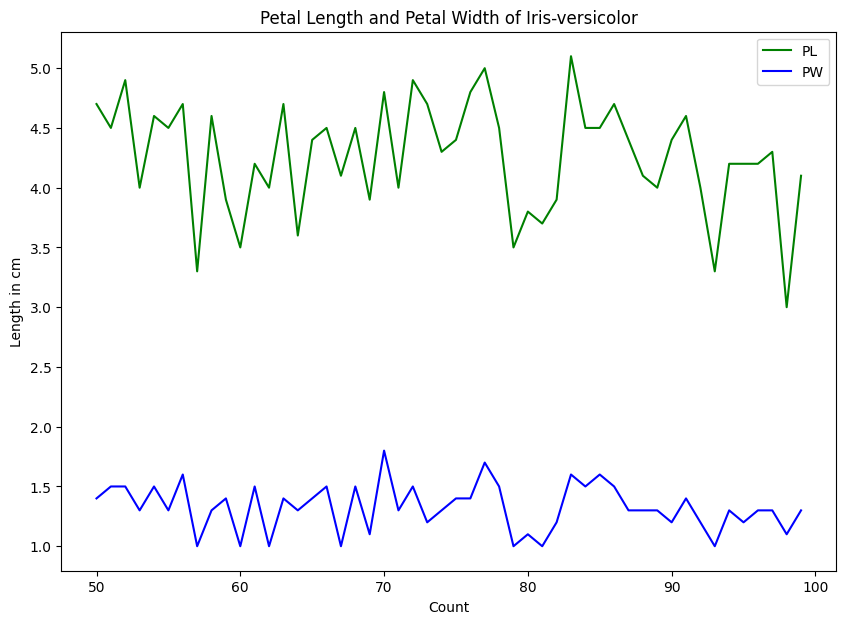

Iris-virginica


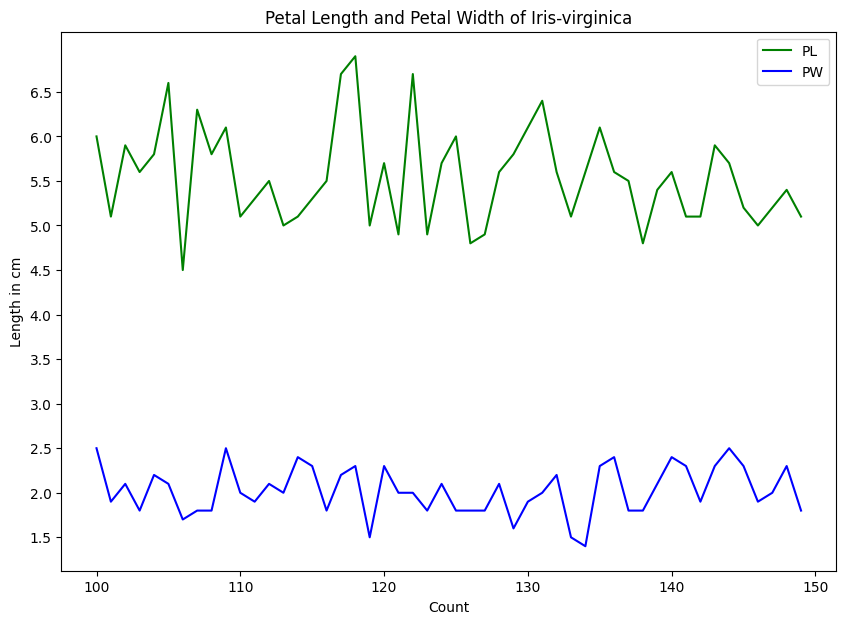

In [65]:
# Calling the function to plot the values
plot_pl_and_pw(data.Classification.unique())

In [70]:
# Creating a function to show how the Sepal Length and Sepal width varies for each type of flower
def plot_sl_and_sw(flower):
  '''
  Plots the sepal length and sepal width of the given category of flower
  '''
  for i in flower:
    plt.figure(figsize=(10,7))
    print(i)
    plt.yticks(np.arange(0,10,0.5))
    plt.xlabel("Count")
    plt.ylabel("Length in cm")
    plt.plot(data[(data.Classification == i)].SL, color='green')
    plt.plot(data[(data.Classification == i)].SW, color='blue')
    plt.title(f"Sepal Length and Sepal Width of {i}")
    plt.legend(['SL','SW'])
    plt.show()


Iris-setosa


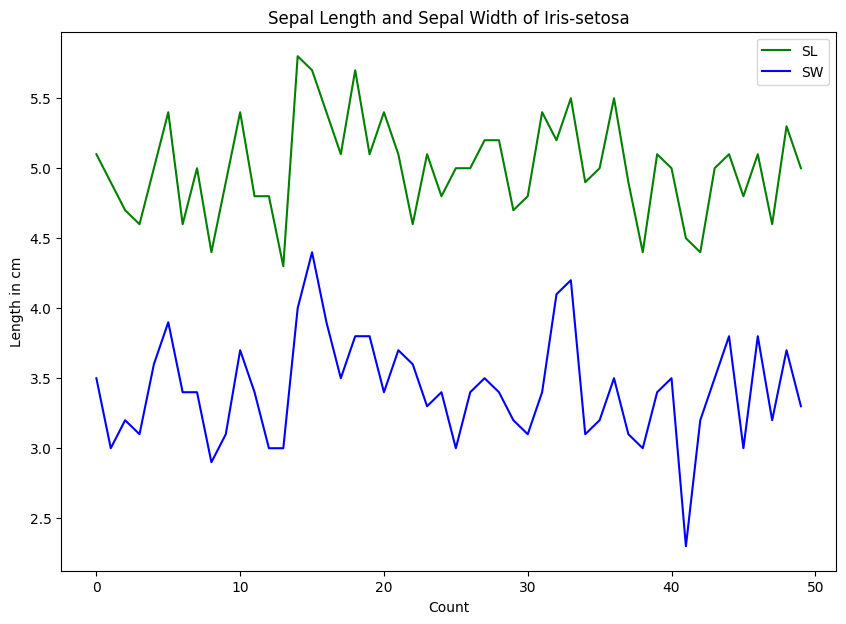

Iris-versicolor


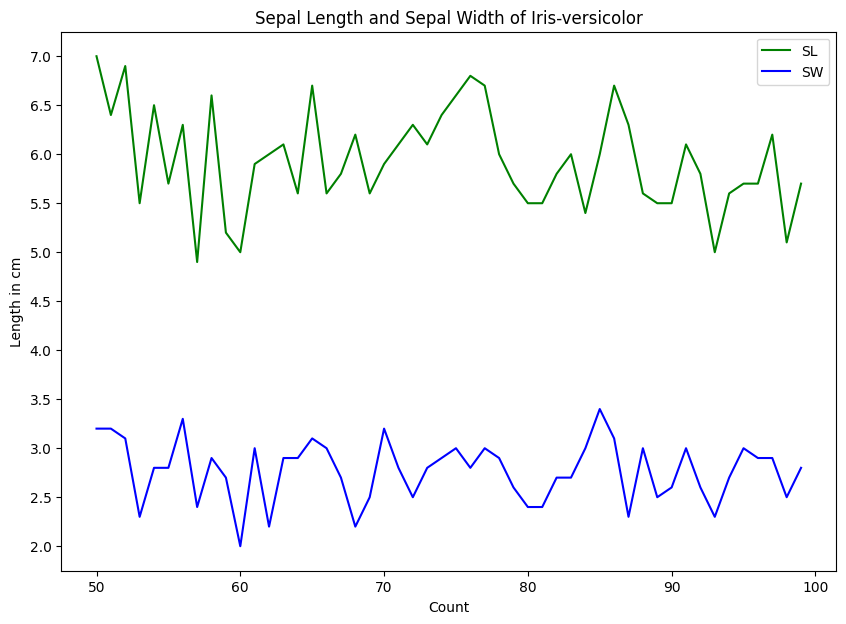

Iris-virginica


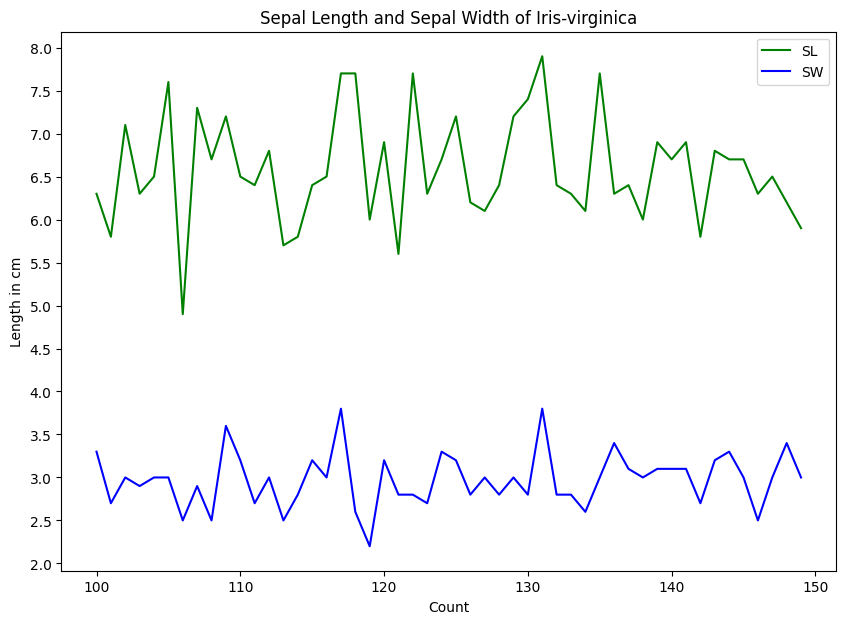

In [71]:
# Calling the function to plot the values
plot_sl_and_sw(data.Classification.unique())

It can be determined that
* `Iris-setosa` has the smallest Petal Width and Petal Length
* `Iris-virginica` has the comparitively largest petal length and petal width
* `Iris-virginica` has the comparitively largest sepal length and sepal width


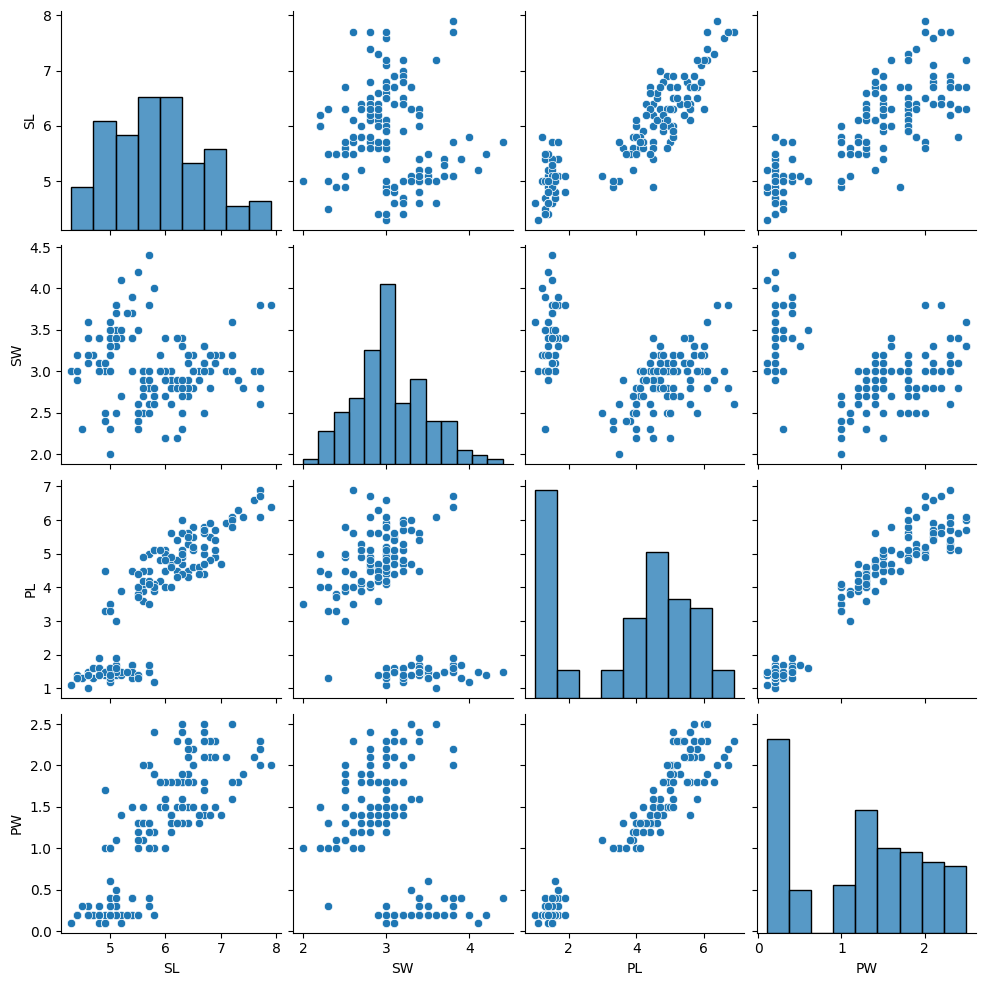

In [85]:
#Plotting the pairplot
sns.pairplot(data)

<ipython-input-86-ab1b85f24b1e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True);


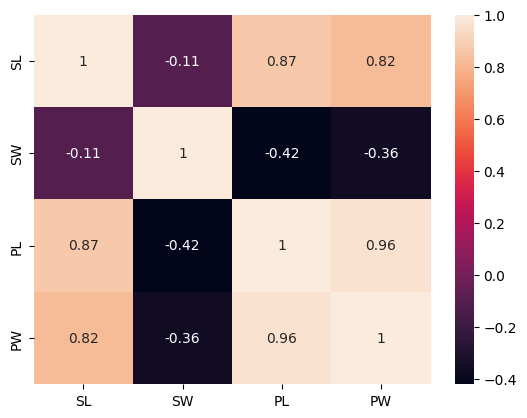

In [86]:
# Plotting the heatmap of the corelation between SL SW and PL, PW
sns.heatmap(data.corr(), annot=True);